# Krystyn Gutu
#### Intro to Deep Learning | Professor Sarbanes | Project 1: EDA of NYC's Yellow Taxi Trip Records from 2020 | Monday, October 17, 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Look for issues in the data and find correlations among the various variables in order to improve ride time predictions. Create the training dataset on data based on March of 2020, and evaluate the dataset on data based on May of 2020. https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [2]:
jan2020_taxis = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine = 'fastparquet')
march2020_taxis = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine = 'fastparquet')
may2020_taxis = pd.read_parquet('yellow_tripdata_2020-05.parquet', engine = 'fastparquet')

In [3]:
march_may_2020 = pd.concat([march2020_taxis, may2020_taxis])

In [4]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_data_validation as tfdv

## Step 1: Prep the data to feed it into a model.

In [5]:
march_may_2020.shape

(3356102, 19)

In [6]:
march_may_2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN


In [7]:
bouroughs_dict = {2: 'Queens', 27: 'Queens', 201: 'Queens', 117: 'Queens', 86: 'Queens', 30: 'Queens', 132: 'Queens', 
                  124: 'Queens', 180: 'Queens', 216: 'Queens', 10: 'Queens', 218: 'Queens', 219: 'Queens', 203: 'Queens',
                  139: 'Queens', 38: 'Queens', 205: 'Queens', 215: 'Queens', 258: 'Queens', 197: 'Queens', 130: 'Queens',
                  122: 'Queens', 191: 'Queens', 19: 'Queens', 101: 'Queens', 64: 'Queens', 175: 'Queens', 98: 'Queens',
                  131: 'Queens', 28: 'Queens', 134: 'Queens', 96: 'Queens', 102: 'Queens', 198: 'Queens', 160: 'Queens',
                  157: 'Queens', 226: 'Queens', 146: 'Queens', 145: 'Queens', 193: 'Queens', 7: 'Queens', 8: 'Queens',
                  179: 'Queens', 223: 'Queens', 207: 'Queens', 138: 'Queens', 129: 'Queens', 260: 'Queens', 
                  83: 'Queens', 82: 'Queens', 196: 'Queens', 95: 'Queens', 56: 'Queens', 93: 'Queens', 135: 'Queens',
                  192: 'Queens', 92: 'Queens', 253: 'Queens', 73: 'Queens', 53: 'Queens', 252: 'Queens', 15: 'Queens',
                  16: 'Queens', 9: 'Queens', 121: 'Queens', 173: 'Queens', 70: 'Queens', 171: 'Queens', 57: 'Queens',
                  153: 'Manhattan', 128: 'Manhattan', 127: 'Manhattan', 243: 'Manhattan', 120: 'Manhattan',
                  244: 'Manhattan', 116: 'Manhattan', 42: 'Manhattan', 152: 'Manhattan', 166: 'Manhattan',
                  41: 'Manhattan', 74: 'Manhattan', 194: 'Manhattan', 24: 'Manhattan', 151: 'Manhattan', 75: 'Manhattan',
                  238: 'Manhattan', 239: 'Manhattan', 43: 'Manhattan', 236: 'Manhattan', 263: 'Manhattan', 262: 'Manhattan',
                  143: 'Manhattan', 142: 'Manhattan', 202: 'Manhattan', 237: 'Manhattan', 141: 'Manhattan', 140: 'Manhattan',
                  50: 'Manhattan', 48: 'Manhattan', 230: 'Manhattan', 163: 'Manhattan', 161: 'Manhattan', 162: 'Manhattan',
                  229: 'Manhattan', 233: 'Manhattan', 100: 'Manhattan', 170: 'Manhattan', 246: 'Manhattan', 68: 'Manhattan',
                  90: 'Manhattan', 186: 'Manhattan', 234: 'Manhattan', 164: 'Manhattan', 107: 'Manhattan',
                  137: 'Manhattan', 224: 'Manhattan', 4: 'Manhattan', 79: 'Manhattan', 232: 'Manhattan', 144: 'Manhattan',
                  148: 'Manhattan', 114: 'Manhattan', 113: 'Manhattan', 211: 'Manhattan', 125: 'Manhattan', 158: 'Manhattan',
                  249: 'Manhattan', 231: 'Manhattan', 45: 'Manhattan', 13: 'Manhattan', 261: 'Manhattan', 87: 'Manhattan', 
                  209: 'Manhattan', 12: 'Manhattan', 88: 'Manhattan', 105: 'Manhattan', 104: 'Manhattan', 103: 'Manhattan', 
                  112: 'Brooklyn', 255: 'Brooklyn', 256: 'Brooklyn', 80: 'Brooklyn', 217: 'Brooklyn', 17: 'Brooklyn',
                  225: 'Brooklyn', 36: 'Brooklyn', 37: 'Brooklyn', 61: 'Brooklyn', 177: 'Brooklyn', 77: 'Brooklyn',
                  35: 'Brooklyn', 72: 'Brooklyn', 63: 'Brooklyn', 76: 'Brooklyn', 222: 'Brooklyn', 39: 'Brooklyn', 
                  188: 'Brooklyn', 62: 'Brooklyn', 49: 'Brooklyn', 97: 'Brooklyn', 34: 'Brooklyn', 66: 'Brooklyn',
                  65: 'Brooklyn', 33: 'Brooklyn', 25: 'Brooklyn', 54: 'Brooklyn', 52: 'Brooklyn', 195: 'Brooklyn',
                  40: 'Brooklyn', 106: 'Brooklyn', 181: 'Brooklyn', 189: 'Brooklyn', 190: 'Brooklyn', 257: 'Brooklyn',
                  111: 'Brooklyn', 228: 'Brooklyn', 227: 'Brooklyn', 26: 'Brooklyn', 14: 'Brooklyn', 67: 'Brooklyn',
                  22: 'Brooklyn', 11: 'Brooklyn', 21: 'Brooklyn', 108: 'Brooklyn', 55: 'Brooklyn', 29: 'Brooklyn',
                  150: 'Brooklyn', 154: 'Brooklyn', 210: 'Brooklyn', 123: 'Brooklyn', 149: 'Brooklyn', 155: 'Brooklyn',
                  91: 'Brooklyn', 71: 'Brooklyn', 85: 'Brooklyn', 89: 'Brooklyn', 133: 'Brooklyn',  178: 'Brooklyn',
                  165: 'Brooklyn', 200: 'Bronx', 240: 'Bronx', 220: 'Bronx', 241: 'Bronx', 174: 'Bronx', 254: 'Bronx',
                  259: 'Bronx', 81: 'Bronx', 51: 'Bronx', 184: 'Bronx', 46: 'Bronx', 3: 'Bronx', 32: 'Bronx', 31: 'Bronx',
                  20: 'Bronx', 18: 'Bronx', 136: 'Bronx', 94: 'Bronx', 235: 'Bronx', 169: 'Bronx', 119: 'Bronx', 47: 'Bronx',
                  69: 'Bronx', 247: 'Bronx', 167: 'Bronx', 159: 'Bronx', 168: 'Bronx', 126: 'Bronx', 199: 'Bronx',
                  147: 'Bronx', 60: 'Bronx', 213: 'Bronx', 212: 'Bronx', 78: 'Bronx', 250: 'Bronx', 182: 'Bronx',
                  59: 'Bronx',248: 'Bronx', 185: 'Bronx', 242: 'Bronx', 183: 'Bronx', 208: 'Bronx', 58: 'Bronx',
                  156: 'Staten Island', 23: 'Staten Island', 187:'Staten Island', 251: 'Staten Island', 245: 'Staten Island',
                  206: 'Staten Island', 115: 'Staten Island', 221: 'Staten Island', 6: 'Staten Island', 214: 'Staten Island',
                  172: 'Staten Island', 176: 'Staten Island', 110: 'Staten Island', 109: 'Staten Island', 84: 'Staten Island',
                  44: 'Staten Island', 204: 'Staten Island', 5: 'Staten Island', 99: 'Staten Island', 118: 'Staten Island'}

In [8]:
march_may_2020['starting_burough'] = march_may_2020['PULocationID'].map(bouroughs_dict)
march_may_2020['ending_burough'] = march_may_2020['DOLocationID'].map(bouroughs_dict)

march_may_2020['starting_burough'].fillna('Unknown', inplace = True)
march_may_2020['ending_burough'].fillna('Unknown', inplace = True)
march_may_2020.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,starting_burough,ending_burough
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,...,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN,Manhattan,Brooklyn
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,...,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN,Queens,Queens
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,...,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN,Manhattan,Manhattan
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,...,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN,Manhattan,Manhattan
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,...,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN,Manhattan,Manhattan
5,1,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,1.0,Y,113,142,1,...,3.0,0.5,3.75,0.0,0.3,22.55,2.5,NaN,Manhattan,Manhattan
6,1,2020-03-01 00:43:21,2020-03-01 01:14:36,1.0,14.10,1.0,Y,237,14,1,...,3.0,0.5,8.85,0.0,0.3,53.15,2.5,NaN,Manhattan,Brooklyn
7,1,2020-03-01 00:51:35,2020-03-01 01:00:17,1.0,1.00,1.0,N,234,114,1,...,3.0,0.5,1.30,0.0,0.3,12.10,2.5,NaN,Manhattan,Manhattan
8,1,2020-03-01 00:13:42,2020-03-01 00:23:00,4.0,1.10,1.0,N,148,211,1,...,3.0,0.5,2.00,0.0,0.3,13.30,2.5,NaN,Manhattan,Manhattan
9,1,2020-03-01 00:25:05,2020-03-01 00:31:06,2.0,1.30,1.0,N,211,249,1,...,3.0,0.5,2.00,0.0,0.3,12.30,2.5,NaN,Manhattan,Manhattan


In [9]:
march_may_2020['p_hour'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).hour
march_may_2020['p_day'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).day
march_may_2020['p_month'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).month
march_may_2020['p_year'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).year

march_may_2020['d_hour'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).hour
march_may_2020['d_day'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).day
march_may_2020['d_month'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).month
march_may_2020['d_year'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).year

march_may_2020.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,starting_burough,ending_burough,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,...,Manhattan,Brooklyn,0,1,3,2020,1,1,3,2020
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,...,Queens,Queens,0,1,3,2020,0,1,3,2020
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
5,1,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,1.0,Y,113,142,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
6,1,2020-03-01 00:43:21,2020-03-01 01:14:36,1.0,14.10,1.0,Y,237,14,1,...,Manhattan,Brooklyn,0,1,3,2020,1,1,3,2020
7,1,2020-03-01 00:51:35,2020-03-01 01:00:17,1.0,1.00,1.0,N,234,114,1,...,Manhattan,Manhattan,0,1,3,2020,1,1,3,2020
8,1,2020-03-01 00:13:42,2020-03-01 00:23:00,4.0,1.10,1.0,N,148,211,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
9,1,2020-03-01 00:25:05,2020-03-01 00:31:06,2.0,1.30,1.0,N,211,249,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020


In [10]:
print(march_may_2020['p_year'].nsmallest(20))

493113     2008
571074     2008
1442027    2008
1645605    2008
2370152    2008
97408      2008
257580     2009
583939     2009
583940     2009
917257     2009
949841     2009
1425797    2009
1809054    2009
1809055    2009
1820115    2009
1820116    2009
2149198    2009
2800965    2009
35086      2009
35718      2009
Name: p_year, dtype: int64


In [11]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.p_year == 2008].index)
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.p_year == 2009].index)
print(march_may_2020['p_year'].nsmallest(20))

0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
11    2020
12    2020
13    2020
14    2020
15    2020
16    2020
17    2020
18    2020
19    2020
Name: p_year, dtype: int64


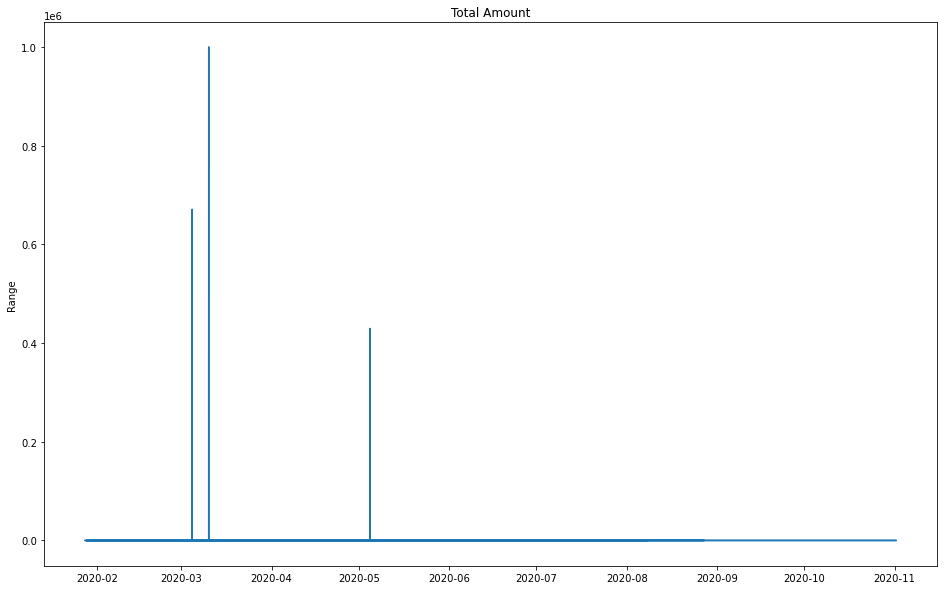

In [12]:
plt.figure(figsize = (16, 10))
plt.plot(march_may_2020['tpep_pickup_datetime'], march_may_2020['total_amount'])
plt.title('Total Amount')
plt.ylabel('Range')
plt.show()

### Look for missing, null, NaN records.

### Utilize b) the TFDV (TensorFlow Data Validation) module with the powerful graphical statistics generated (apache beam library…)

In [13]:
train_stats = tfdv.generate_statistics_from_dataframe(march_may_2020)
tfdv.visualize_statistics(train_stats)

In [14]:
march_may_2020 = march_may_2020.drop(['airport_fee'], axis = 1)
march_may_2020.store_and_fwd_flag.value_counts()

N    3228559
Y      30808
Name: store_and_fwd_flag, dtype: int64

In [15]:
march_may_2020['store_and_fwd_flag'].replace({'N': 0, 'Y': 1}, inplace = True)

In [16]:
borough_names = march_may_2020.copy()

march_may_2020['starting_burough'].replace({'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Bronx': 4, 'Staten Island': 5,
                                            'Unknown': 6}, inplace = True)
march_may_2020['ending_burough'].replace({'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Bronx': 4, 'Staten Island': 5,
                                          'Unknown': 6}, inplace = True)

In [17]:
march_may_2020.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          96709
trip_distance                0
RatecodeID               96709
store_and_fwd_flag       96709
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     96709
starting_burough             0
ending_burough               0
p_hour                       0
p_day                        0
p_month                      0
p_year                       0
d_hour                       0
d_day                        0
d_month                      0
d_year                       0
dtype: int64

### Transform data – all entries should be numeric.

In [18]:
from datetime import datetime
march_may_2020['ride_in_mins'] = pd.Series(map(lambda x: (x.seconds) / 60, (march_may_2020['tpep_dropoff_datetime'] -
                                                                             march_may_2020['tpep_pickup_datetime'])))

In [19]:
march_may_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356076 entries, 0 to 348414
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     float64       
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  starting_burough       

In [20]:
march_may_2020.nunique()

VendorID                       4
tpep_pickup_datetime     1528556
tpep_dropoff_datetime    1529240
passenger_count               10
trip_distance               4251
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 262
DOLocationID                 261
payment_type                   5
fare_amount                 7817
extra                        309
mta_tax                        7
tip_amount                  3115
tolls_amount                 714
improvement_surcharge          3
total_amount               11865
congestion_surcharge           6
starting_burough               6
ending_burough                 6
p_hour                        24
p_day                         31
p_month                       11
p_year                         1
d_hour                        24
d_day                         31
d_month                       11
d_year                         1
ride_in_mins                9831
dtype: int64

### Find outliers.

In [21]:
march_may_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3356076.0,1.667638,0.474298,1.00,1.000000,2.000000,2.000000,6.000000e+00
passenger_count,3259367.0,1.453860,1.109531,0.00,1.000000,1.000000,1.000000,9.000000e+00
trip_distance,3356076.0,3.658543,317.331329,0.00,1.000000,1.700000,3.120000,2.970045e+05
RatecodeID,3259367.0,1.050638,0.737568,1.00,1.000000,1.000000,1.000000,9.900000e+01
store_and_fwd_flag,3259367.0,0.009452,0.096762,0.00,0.000000,0.000000,0.000000,1.000000e+00
PULocationID,3356076.0,162.305449,67.124655,1.00,114.000000,161.000000,233.000000,2.650000e+02
DOLocationID,3356076.0,159.641280,71.276359,1.00,107.000000,161.000000,234.000000,2.650000e+02
payment_type,3356076.0,1.244622,0.524681,0.00,1.000000,1.000000,2.000000,4.000000e+00
fare_amount,3356076.0,12.930601,435.079146,-1259.00,6.500000,9.000000,14.000000,6.711001e+05
extra,3356076.0,1.216663,272.934477,-7.00,0.000000,0.500000,2.500000,5.000008e+05


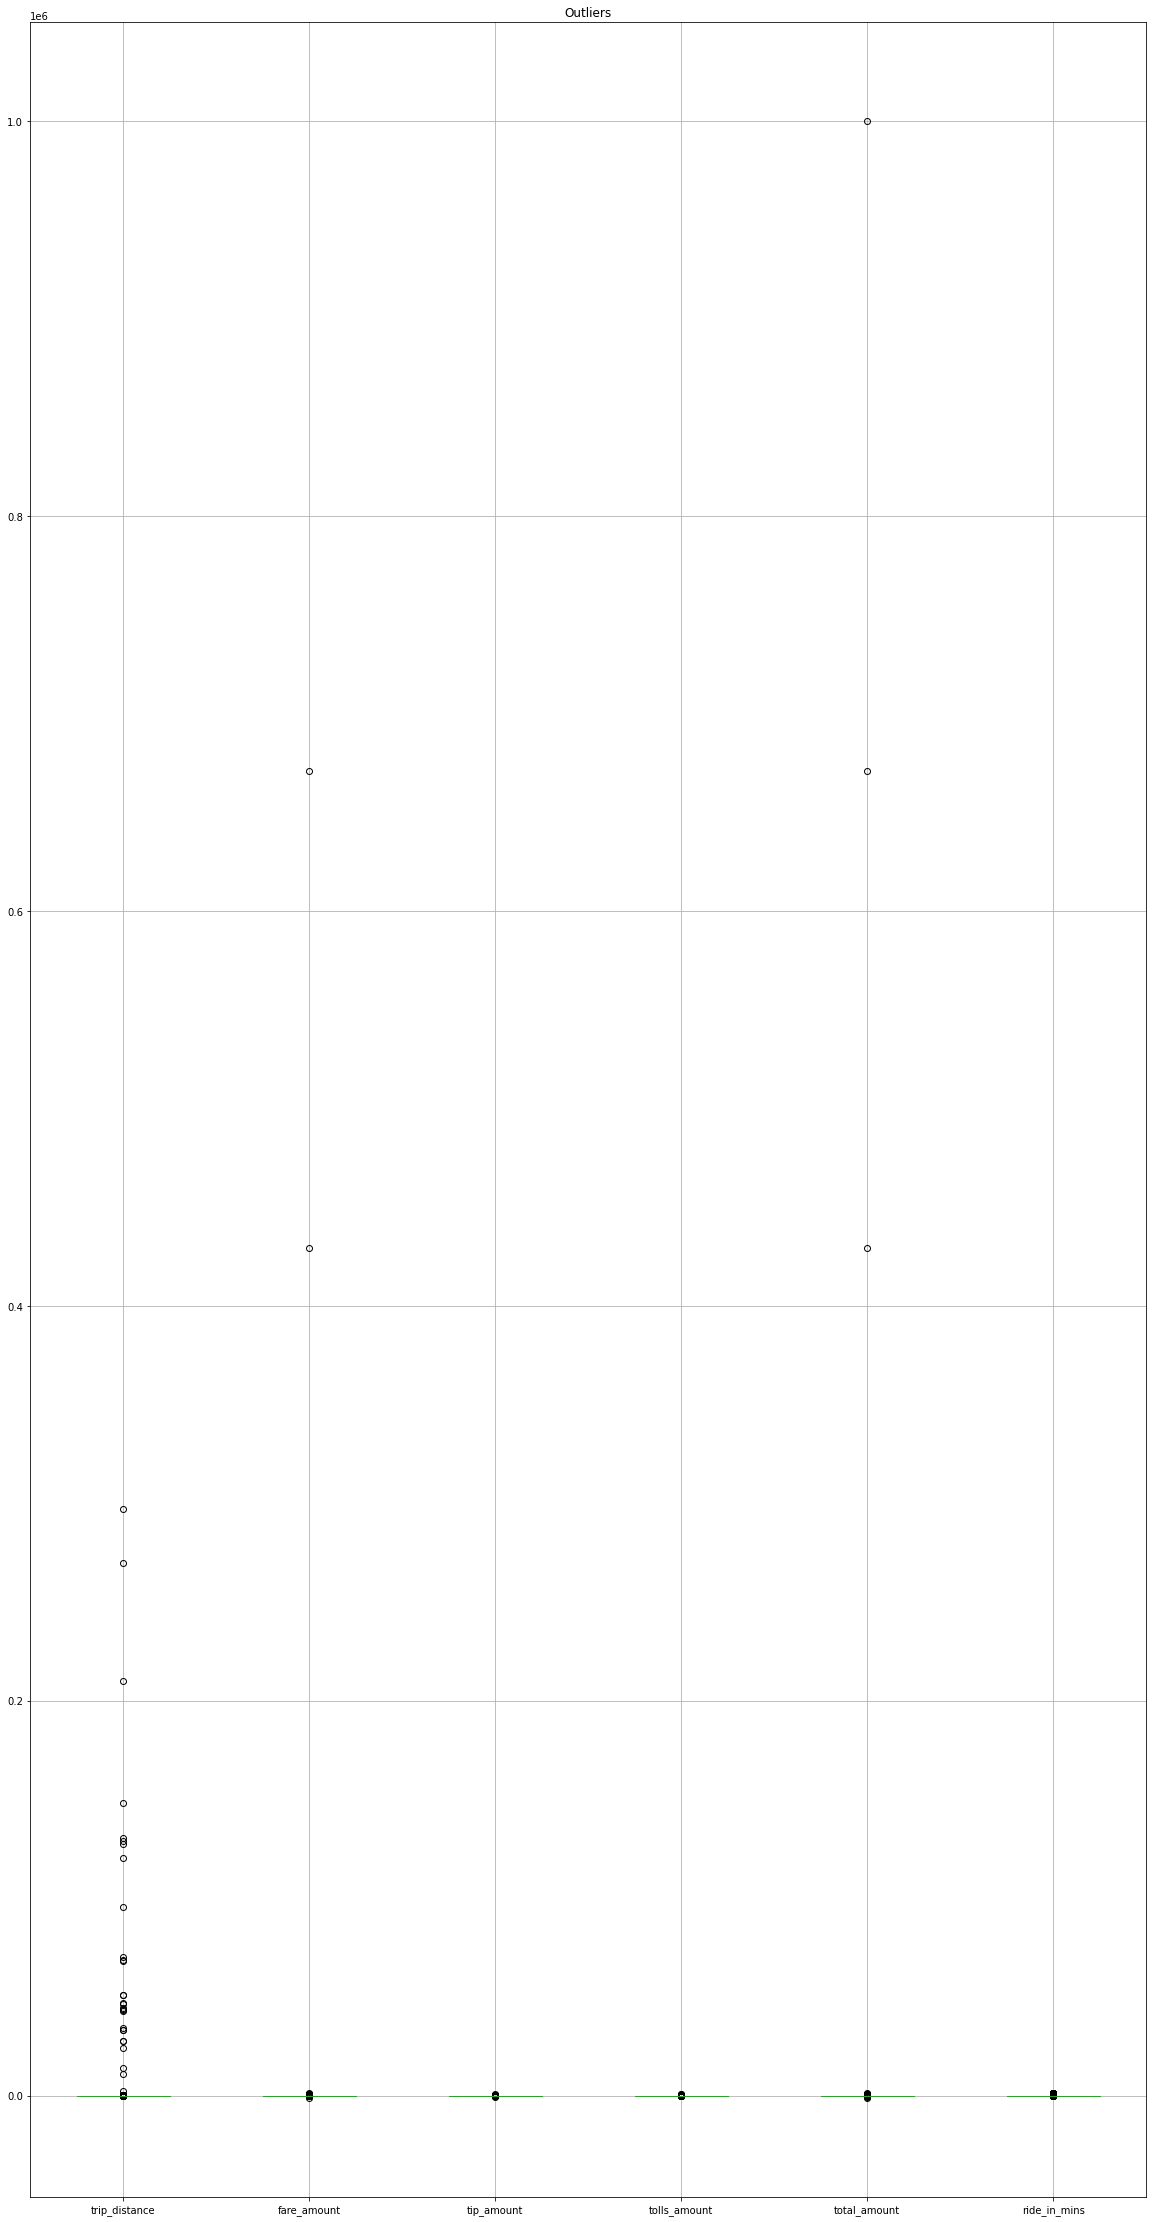

In [22]:
plt.subplots(figsize = (20, 40))
plt.title('Outliers')
boxplot = march_may_2020.boxplot(column = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
                                           'ride_in_mins'])

In [23]:
Q1 = march_may_2020[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
                      'ride_in_mins']].quantile(0.25)

print('Q1: \n', Q1)

Q1: 
 trip_distance     1.000000
fare_amount       6.500000
tip_amount        0.000000
tolls_amount      0.000000
total_amount     11.150000
ride_in_mins      6.233333
Name: 0.25, dtype: float64


In [24]:
Q3 = march_may_2020[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
                      'ride_in_mins']].quantile(0.75)

print('Q3: \n', Q3)

Q3: 
 trip_distance     3.120000
fare_amount      14.000000
tip_amount        2.800000
tolls_amount      0.000000
total_amount     20.150000
ride_in_mins     16.766667
Name: 0.75, dtype: float64


In [25]:
IQR = Q3 - Q1
print('IQR: \n', IQR)

IQR: 
 trip_distance     2.120000
fare_amount       7.500000
tip_amount        2.800000
tolls_amount      0.000000
total_amount      9.000000
ride_in_mins     10.533333
dtype: float64


In [26]:
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(lower_range)
print(upper_range)

trip_distance   -2.180000
fare_amount     -4.750000
tip_amount      -4.200000
tolls_amount     0.000000
total_amount    -2.350000
ride_in_mins    -9.566667
dtype: float64
trip_distance     6.300000
fare_amount      25.250000
tip_amount        7.000000
tolls_amount      0.000000
total_amount     33.650000
ride_in_mins     32.566667
dtype: float64


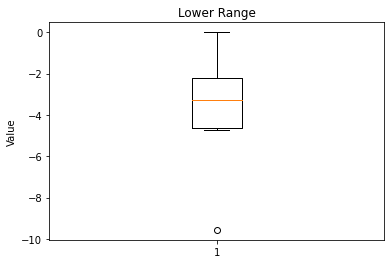

In [27]:
plt.boxplot(lower_range)
plt.title('Lower Range')
plt.ylabel('Value')
plt.show()

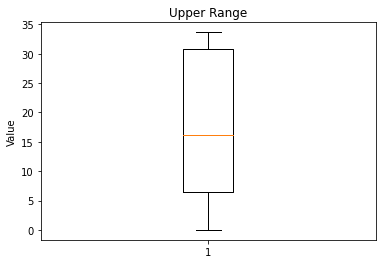

In [28]:
plt.boxplot(upper_range)
plt.title('Upper Range')
plt.ylabel('Value')
plt.show()

In [29]:
print(march_may_2020['total_amount'].nlargest(10))

1880017    1000003.80
732292      671103.17
30597       429562.25
2848144       1260.30
133229        1042.82
2744264       1023.67
39290          950.30
279198         846.29
1755345        840.35
39293          840.35
Name: total_amount, dtype: float64


In [30]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.total_amount >= 1000].index)
print(march_may_2020['total_amount'].nlargest(200))

39290      950.30
279198     846.29
1755345    840.35
39293      840.35
39294      840.35
            ...  
164992     300.30
174439     300.30
200990     300.30
120942     300.29
4954       299.04
Name: total_amount, Length: 200, dtype: float64


In [31]:
print(march_may_2020['trip_distance'].nlargest(10))

291788     297004.51
2973275    269803.73
2978212    210148.62
310208     148342.26
328045     130587.13
306487     128870.92
297584     127377.15
343879     120206.70
326713      95650.01
2984809     70137.72
Name: trip_distance, dtype: float64


In [32]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.trip_distance >= 1000].index)
print(march_may_2020['trip_distance'].nlargest(200))

50776      238.00
2935972    233.69
2965073    230.00
1585323    226.60
8826       223.70
            ...  
1861725     55.07
2741769     55.01
1557480     54.90
1602640     54.88
300689      54.75
Name: trip_distance, Length: 200, dtype: float64


In [33]:
print(march_may_2020['fare_amount'].nlargest(30))

39290      950.00
279198     819.50
826651     750.00
1755345    700.00
2779911    700.00
2779912    700.00
39291      700.00
39293      700.00
39294      700.00
39296      700.00
176640     700.00
50776      656.50
1348047    655.35
2221402    655.35
200398     652.50
2291480    632.50
1585323    616.00
2965073    609.50
2765028    598.50
43357      588.00
2927851    580.00
8826       579.00
2323499    550.00
2963067    548.00
265119     522.50
1900757    519.50
270309     514.00
186365     500.00
1290571    500.00
127228     500.00
Name: fare_amount, dtype: float64


In [34]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.fare_amount >= 500].index)
print(march_may_2020['fare_amount'].nlargest(200))

127229     499.4
2902403    499.0
2916799    499.0
256792     496.5
127985     494.2
           ...  
2879007    250.0
2961113    249.0
1028925    248.0
2659844    248.0
1240687    246.0
Name: fare_amount, Length: 200, dtype: float64


In [35]:
print(march_may_2020['tip_amount'].nlargest(30))

1534781    800.00
563163     493.22
535580     445.50
199716     442.18
283489     400.04
2826837    383.00
2852169    378.00
2478586    370.00
985590     300.30
653046     300.00
2784149    287.00
1672059    250.00
2881590    240.01
1283948    222.11
2747220    213.64
1760515    200.00
1958134    200.00
2685200    200.00
22215      200.00
1482486    188.58
1112542    180.80
2748102    170.00
1315965    150.00
2648772    150.00
213323     147.00
939320     140.00
2651599    135.09
631211     135.00
2750912    130.00
2215401    121.83
Name: tip_amount, dtype: float64


In [36]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.tip_amount >= 300].index)
print(march_may_2020['tip_amount'].nlargest(200))

2784149    287.00
1672059    250.00
2881590    240.01
1283948    222.11
2747220    213.64
            ...  
2950617     62.00
1538361     61.91
1841473     61.85
1388251     61.42
1389554     61.42
Name: tip_amount, Length: 200, dtype: float64


In [37]:
print(march_may_2020['tolls_amount'].nlargest(30))

2081703    601.02
1318158    600.04
37935      221.87
76501      200.00
1610753    102.24
223778      99.12
2935055     98.00
1518300     97.90
51651       96.12
322280      96.12
2957847     91.00
1073385     88.75
139999      85.70
2613443     83.00
1084394     80.00
206584      75.12
1153810     72.00
116250      70.00
911782      70.00
16175       68.12
865         66.75
2685447     65.75
2633299     65.70
1342215     65.00
1423106     65.00
503918      64.75
2612984     62.50
1663923     62.00
120555      61.70
804322      61.42
Name: tolls_amount, dtype: float64


In [38]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.tolls_amount >= 100].index)
print(march_may_2020['tolls_amount'].nlargest(200))

223778     99.12
2935055    98.00
1518300    97.90
51651      96.12
322280     96.12
           ...  
2238006    29.79
2710981    29.75
287077     29.69
1123461    29.62
1675321    29.62
Name: tolls_amount, Length: 200, dtype: float64


In [39]:
print(march_may_2020['ride_in_mins'].nlargest(6500))

2634574    1439.983333
2985080    1439.983333
2985750    1439.983333
2993851    1439.983333
3001581    1439.983333
              ...     
732670      425.133333
1613245     424.133333
2746514     421.416667
2934095     421.033333
1209365     417.833333
Name: ride_in_mins, Length: 6500, dtype: float64


In [40]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.ride_in_mins >= 500].index)
print(march_may_2020['ride_in_mins'].nlargest(200))

2128748    490.816667
2122476    486.000000
115573     484.166667
115573     484.166667
705398     483.750000
              ...    
528091     317.600000
2161940    317.300000
680413     316.183333
1223659    316.150000
1798216    314.650000
Name: ride_in_mins, Length: 200, dtype: float64


In [41]:
march_may_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3349539.0,1.667598,0.474274,1.00,1.000000,2.00,2.00,6.000000
passenger_count,3253094.0,1.453814,1.109462,0.00,1.000000,1.00,1.00,9.000000
trip_distance,3349539.0,2.968633,3.796301,0.00,1.000000,1.70,3.12,233.690000
RatecodeID,3253094.0,1.050497,0.731958,1.00,1.000000,1.00,1.00,99.000000
store_and_fwd_flag,3253094.0,0.009455,0.096776,0.00,0.000000,0.00,0.00,1.000000
PULocationID,3349539.0,162.306231,67.124988,1.00,114.000000,161.00,233.00,265.000000
DOLocationID,3349539.0,159.644167,71.274834,1.00,107.000000,161.00,234.00,265.000000
payment_type,3349539.0,1.244640,0.524630,0.00,1.000000,1.00,2.00,4.000000
fare_amount,3349539.0,12.594761,11.630493,-1259.00,6.500000,9.00,14.00,499.400000
extra,3349539.0,1.067772,1.244974,-7.00,0.000000,0.50,2.50,30.300000


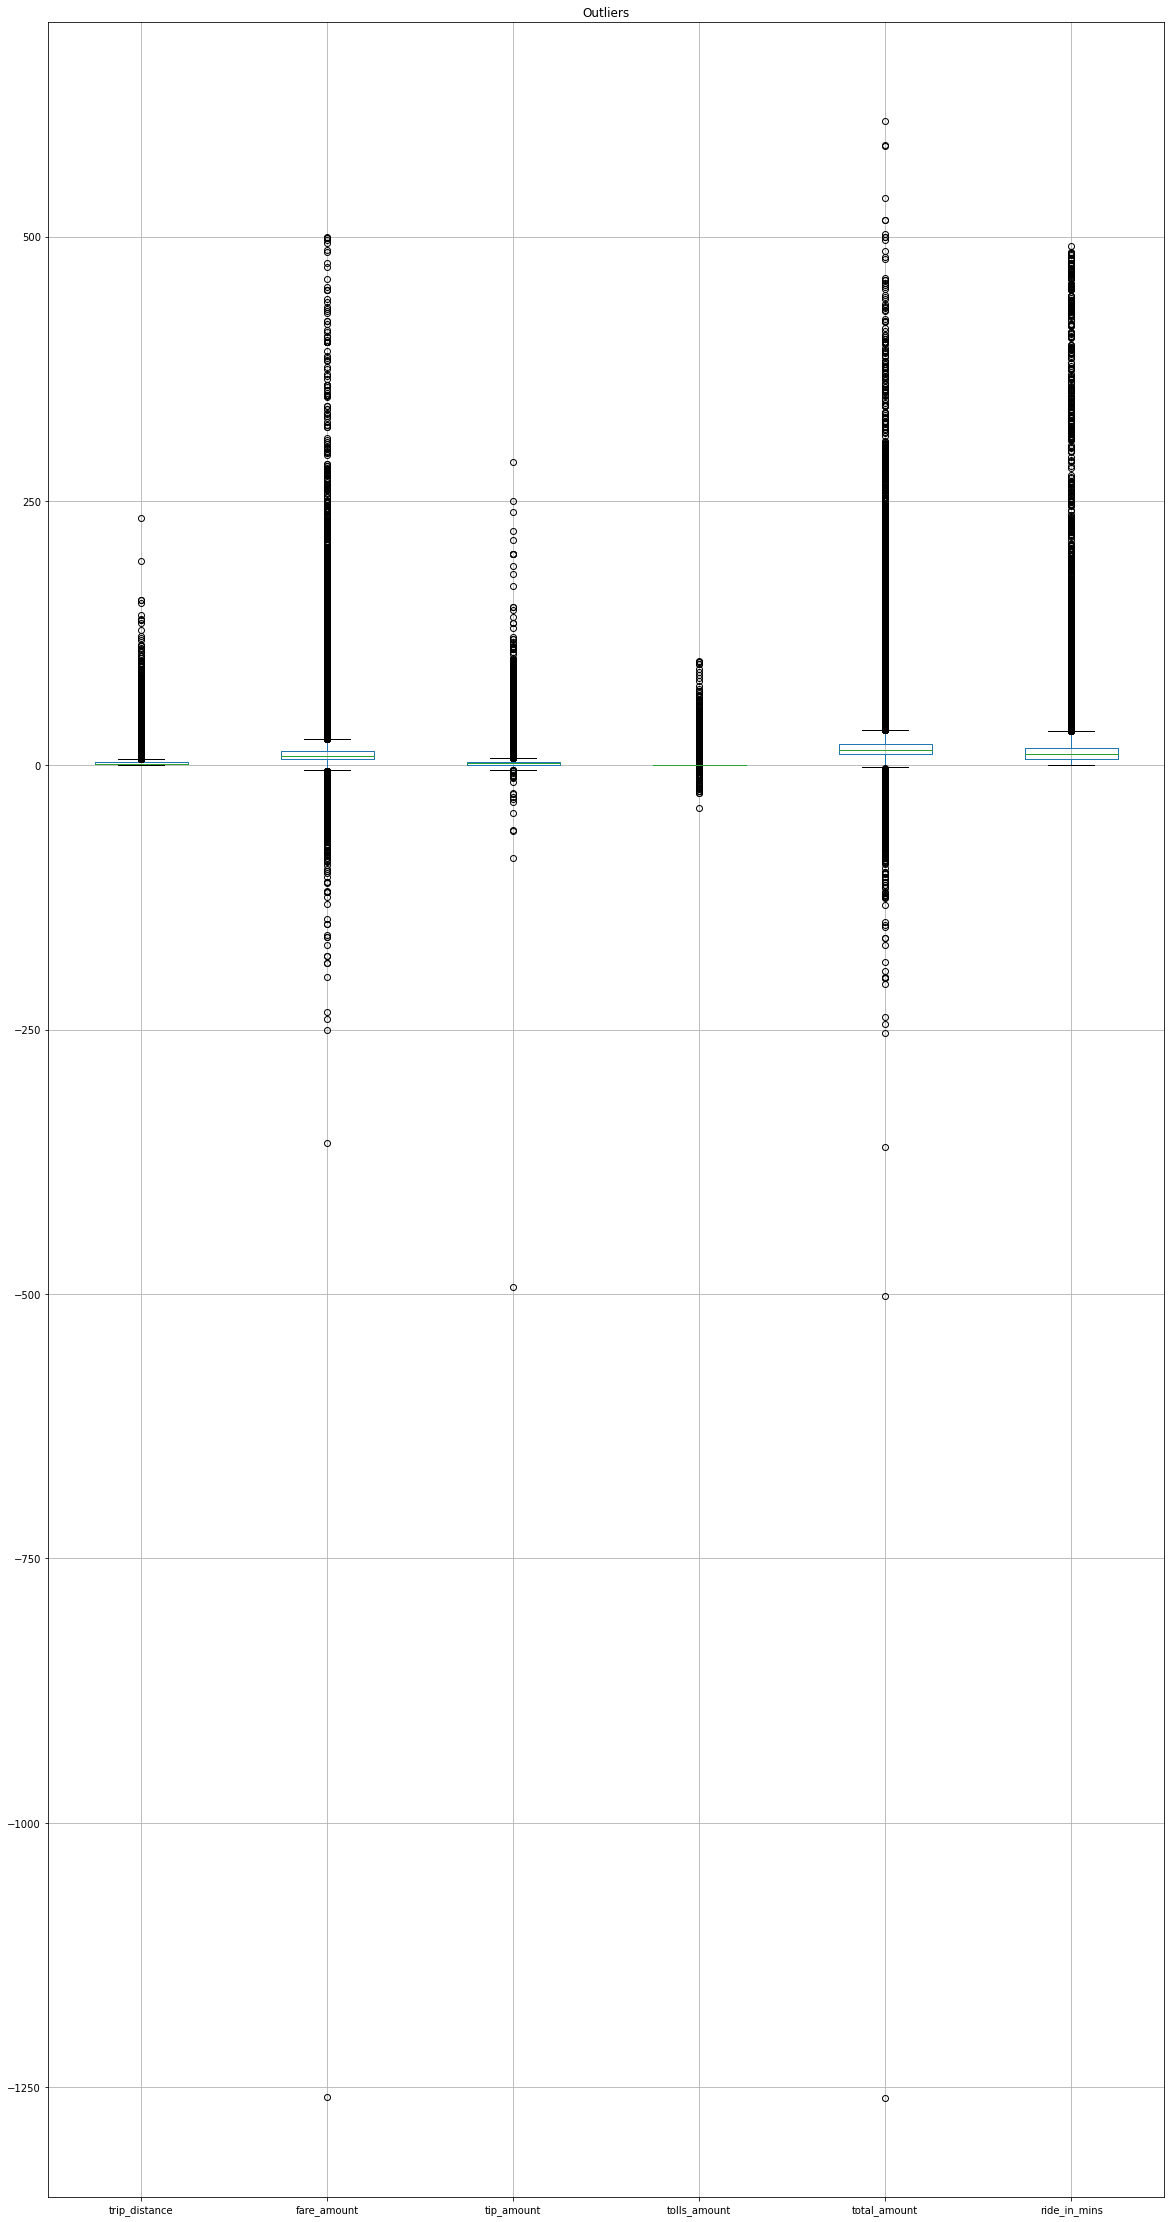

In [42]:
plt.subplots(figsize = (20, 40))
plt.title('Outliers')
boxplot = march_may_2020.boxplot(column = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
                                           'ride_in_mins'])

## Step 2: List all types of data, numeric, categorical, etc.

In [43]:
march_may_2020.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag              float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
starting_burough                  int64
ending_burough                    int64
p_hour                            int64
p_day                             int64
p_month                           int64
p_year                            int64
d_hour                            int64


## Step 3: Perform EDA on the data.
### Utilize a) classic approach in EDA (Pandas, Numpy libraries).

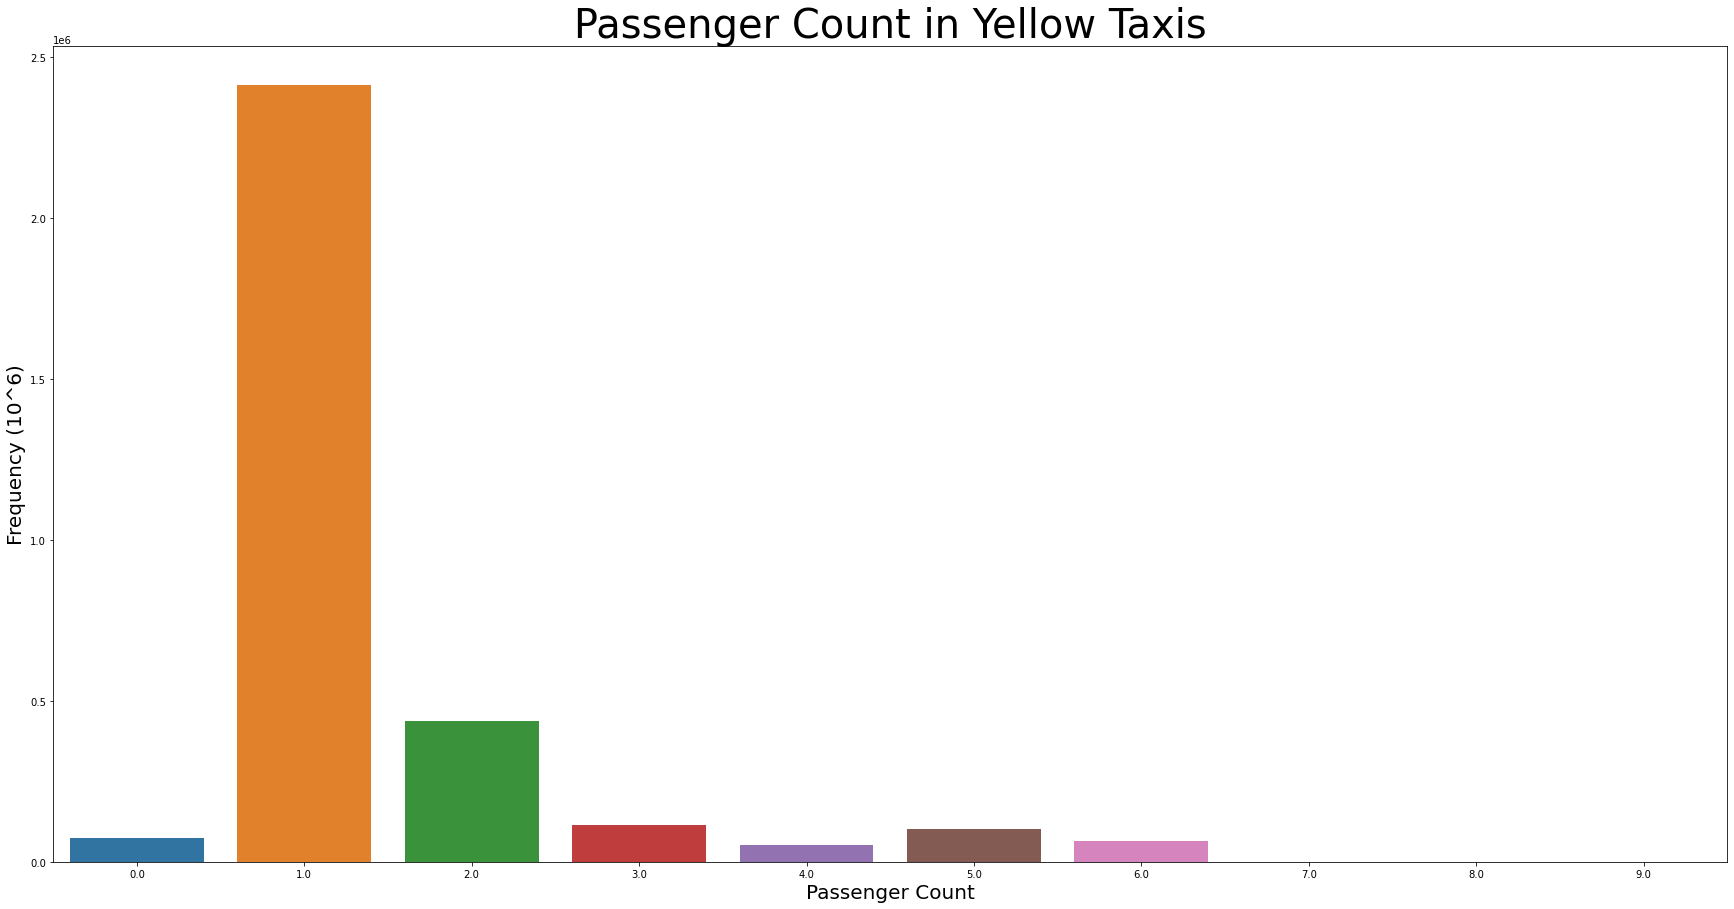

In [44]:
import warnings
warnings.filterwarnings('ignore')

values = march_may_2020['passenger_count'].value_counts().index
frequencies = march_may_2020['passenger_count'].value_counts().values

fig = plt.figure(figsize = (30, 15))

sns.barplot(values, frequencies)
plt.xlabel('Passenger Count',  fontsize = 20)
plt.ylabel('Frequency (10^6)', fontsize = 20)
plt.title('Passenger Count in Yellow Taxis', fontsize = 40)

plt.show()

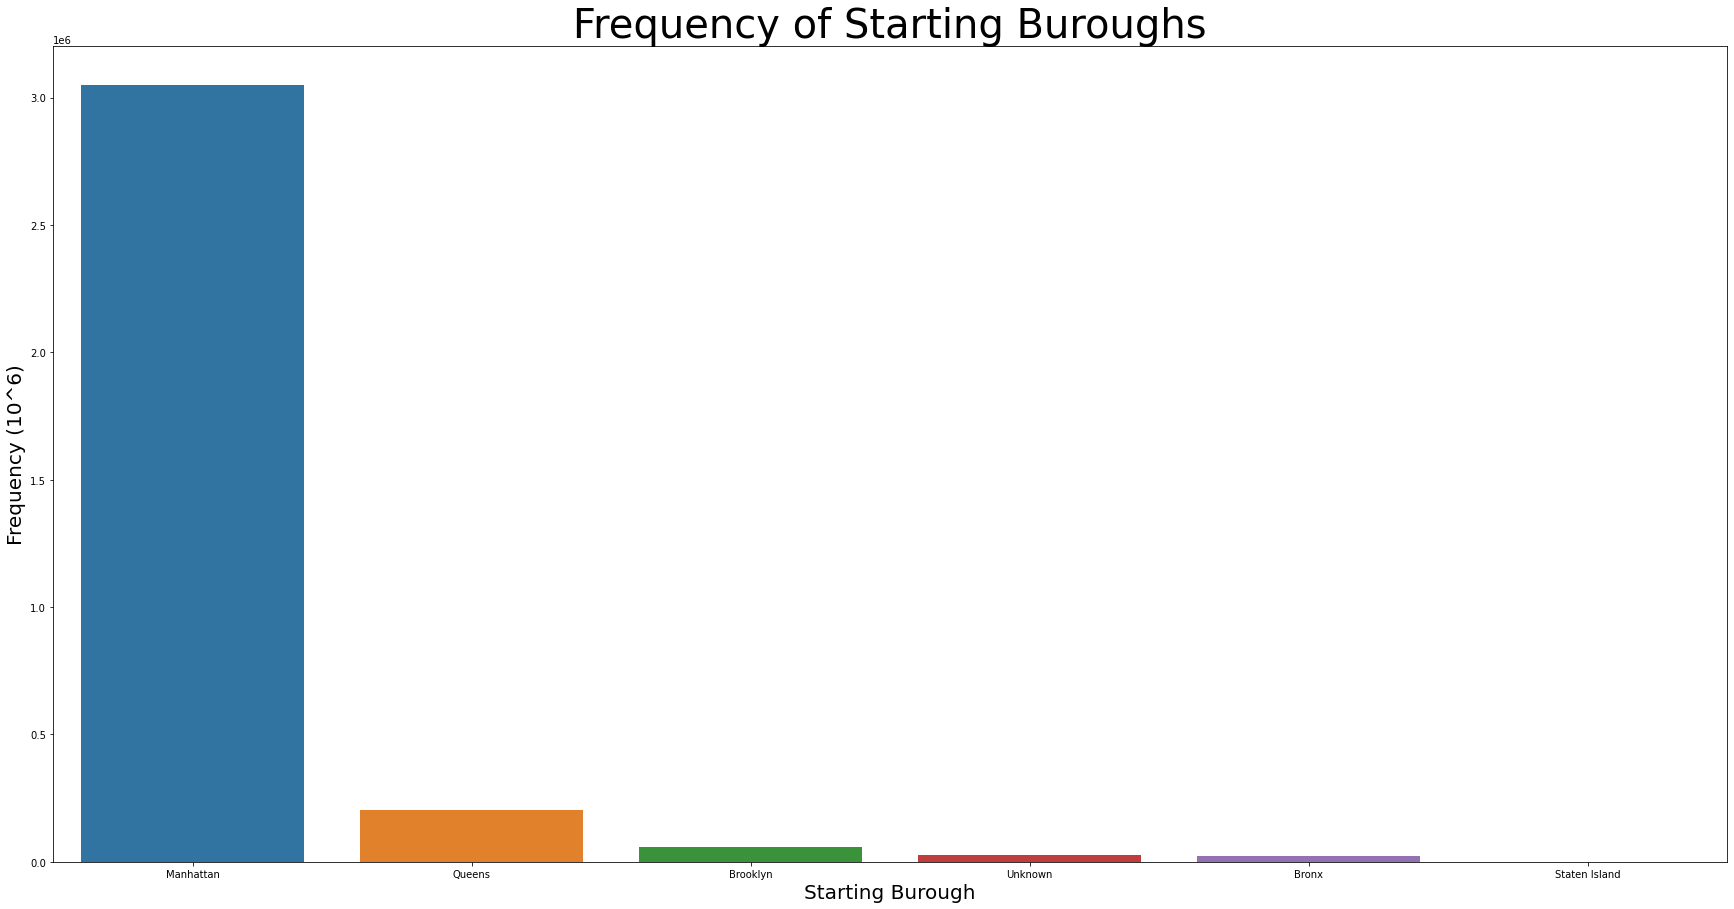

In [45]:
values = borough_names['starting_burough'].value_counts().index
frequencies = borough_names['starting_burough'].value_counts().values

fig = plt.figure(figsize = (30, 15))

sns.barplot(values, frequencies)
plt.xlabel('Starting Burough', fontsize = 20)
plt.ylabel('Frequency (10^6)', fontsize = 20)
plt.title('Frequency of Starting Buroughs', fontsize = 40)

plt.show()

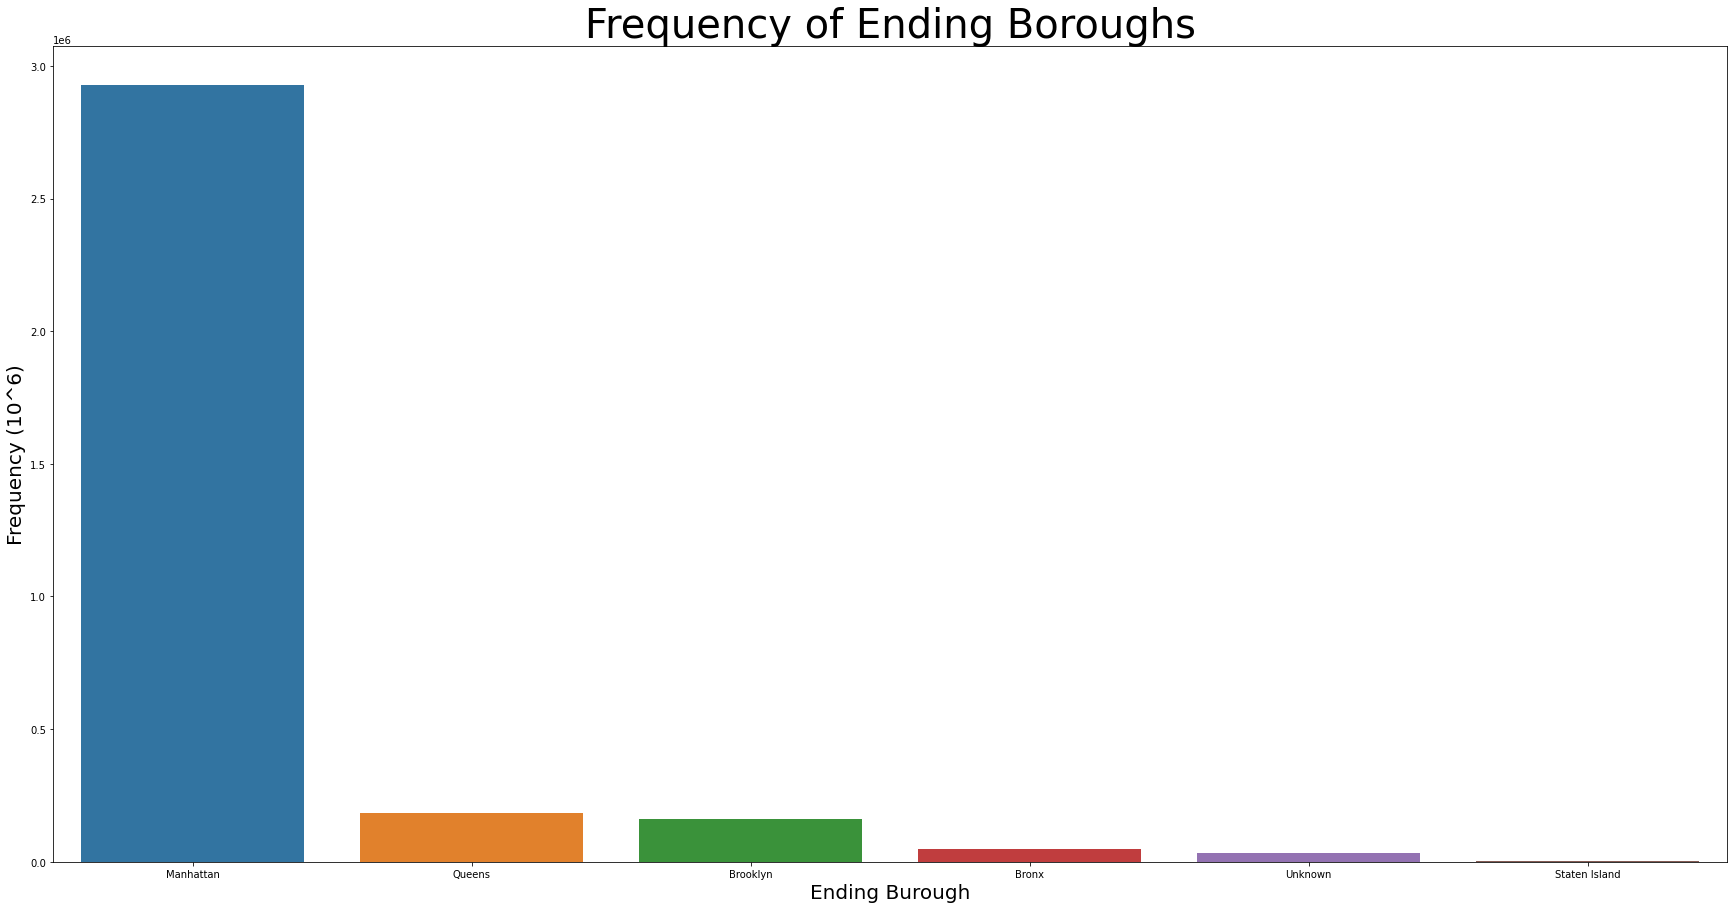

In [46]:
values = borough_names['ending_burough'].value_counts().index
frequencies = borough_names['ending_burough'].value_counts().values

fig = plt.figure(figsize = (30, 15))

sns.barplot(values, frequencies)
plt.xlabel('Ending Burough', fontsize = 20)
plt.ylabel('Frequency (10^6)', fontsize = 20)
plt.title('Frequency of Ending Boroughs', fontsize = 40)

plt.show()

### Present dependencies and correlations among the various features in the data.

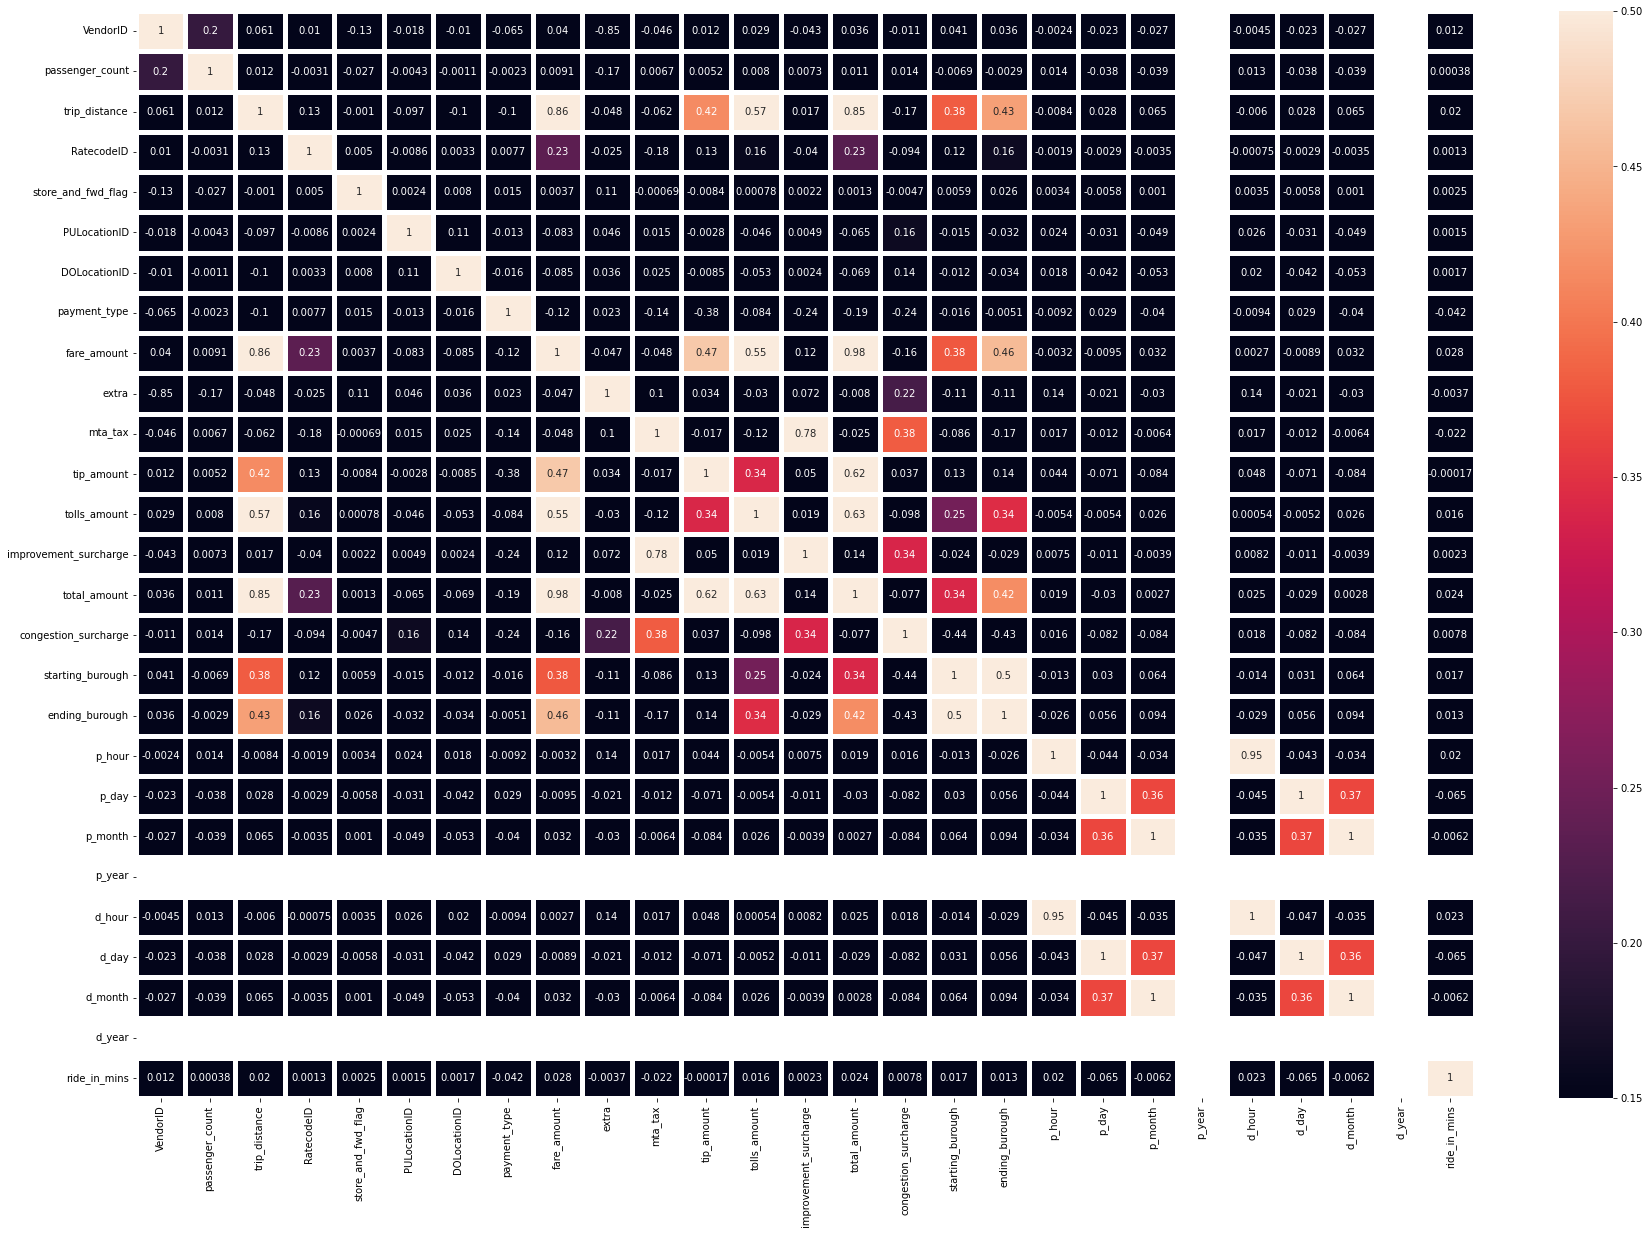

In [47]:
plt.figure(figsize = (30, 20))
sns.heatmap(march_may_2020.corr(), linewidths = 5, vmin = 0.15, vmax = 0.5, annot = True)
plt.yticks(rotation = 0);

### List the most variables (feature importance) that will affect the target label.

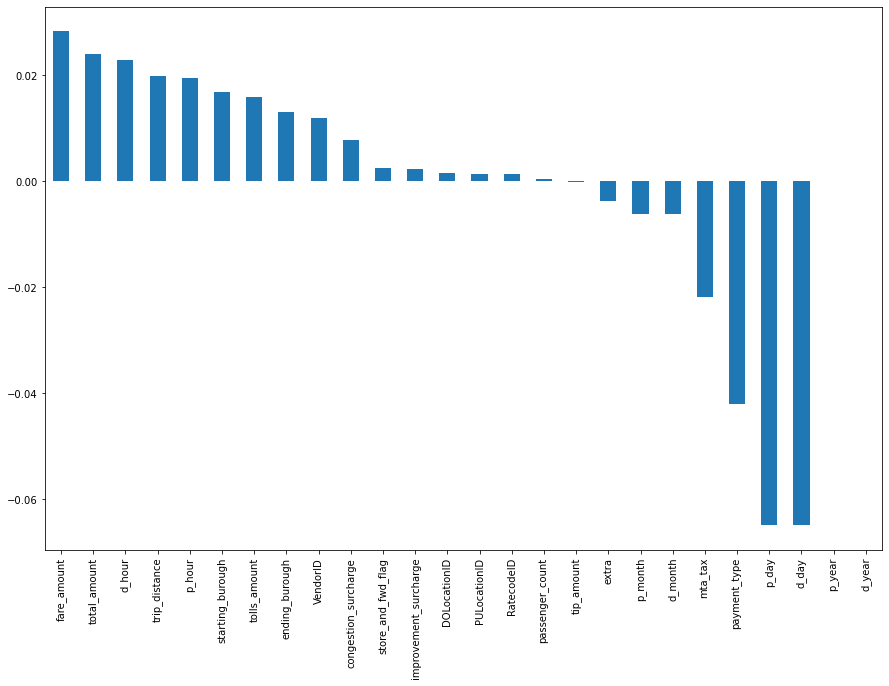

In [48]:
# target variable = ride time

plt.figure(figsize = (15, 10))
march_may_2020.corr()['ride_in_mins'].sort_values(ascending = False)[1:].plot(kind = 'bar');

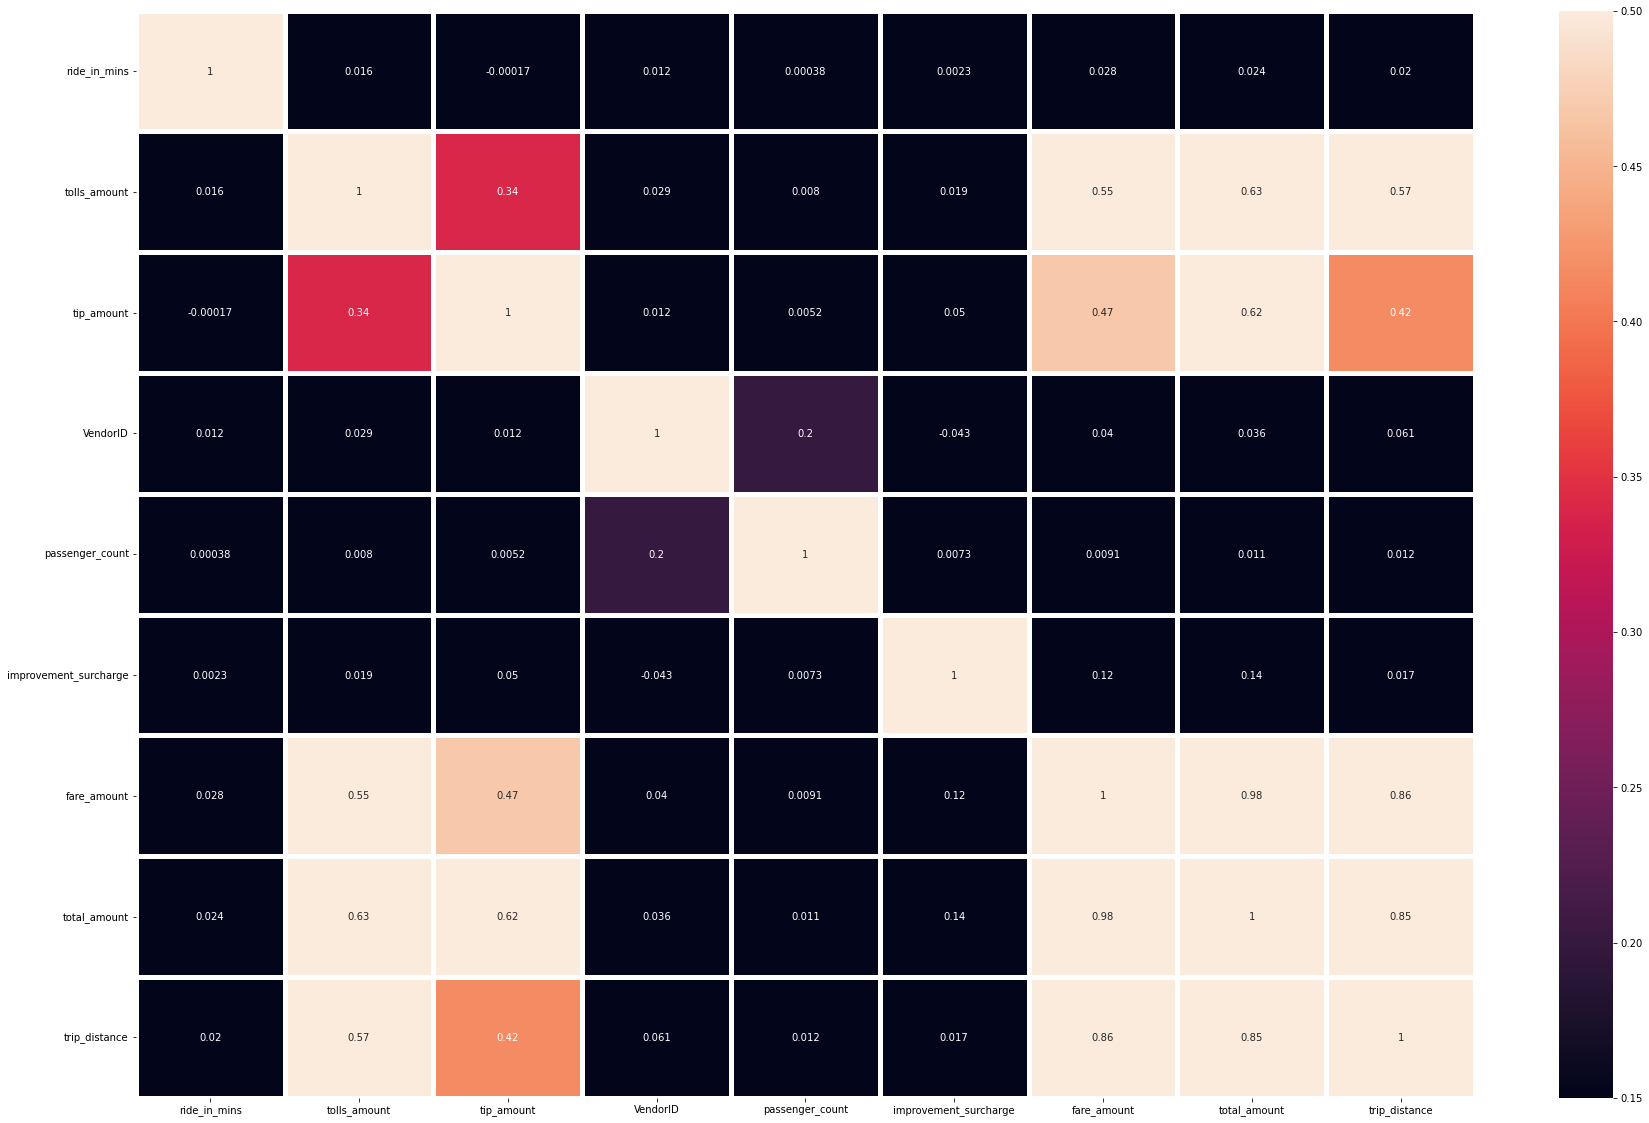

In [49]:
plt.figure(figsize = (30, 20))
sns.heatmap(march_may_2020[['ride_in_mins', 'tolls_amount', 'tip_amount', 'VendorID', 'passenger_count',
                               'improvement_surcharge', 'fare_amount', 'total_amount', 'trip_distance']].corr(),
            linewidths = 5, vmin = 0.15, vmax = 0.5, annot = True)
plt.yticks(rotation = 0);

## << Extra Credit >>: January 2020 data presents the ‘baseline’ of what the NYC Taxi business used to be. Compare the data of Jan-2020 vs Mar-2020. Present your findings.

In [55]:
jan2020_taxis = jan2020_taxis.drop(['RatecodeID', 'store_and_fwd_flag', 'airport_fee'], axis = 1)
jan2020_taxis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Analysis

In [52]:
X = march_may_2020.drop(['ride_in_mins'], axis = 1)
y = march_may_2020['ride_in_mins']

In [53]:
X = march_may_2020.iloc[:, : -1].values
y = march_may_2020.iloc[:, -1].values

In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(march_may_2020, test_size = 0.20, random_state = 0)

print(train.shape)
print(test.shape)

(2679631, 29)
(669908, 29)


In [ ]:
import sweetviz as sv
sv.compare(train, test).show_html("Compare.html")

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
# b = tf.Variable(tf.zeros((100,)))
# W = tf.Variable(tf.random_uniform((784, 100), -1, 1))
# x = tf.placeholder(tf.float32, (1, 784))
# h = tf.nn.relu(tf.matmul(x, W) + b)

# prediction = tf.nn.softmax(...) #Output of neural network
# label = tf.placeholder(tf.float32, [100, 10])
# cross_entropy = -tf.reduce_sum(label * tf.log(prediction), axis=1)